In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split as tts

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr

import warnings 
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_excel('Heart Disease.xlsx')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [13]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [14]:
df.shape

(319795, 18)

In [15]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [16]:
 df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [17]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [19]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [31]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [32]:
df['AgeCategory'] =df['AgeCategory'].replace("80 or older","80<=")

In [33]:
df['AgeCategory'].unique()

array(['55-59', '80<=', '65-69', '75-79', '40-44', '70-74', '60-64',
       '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'], dtype=object)

<Figure size 5000x2000 with 0 Axes>

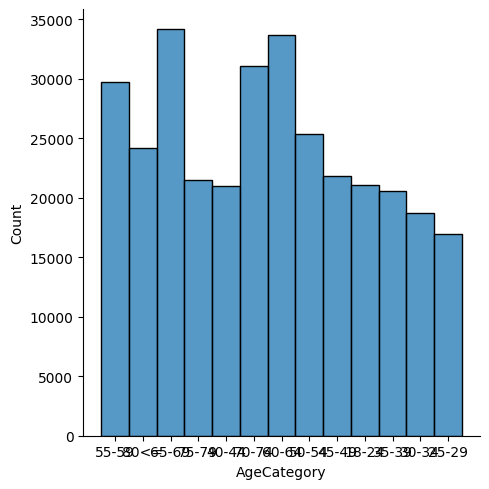

In [35]:
plt.figure(figsize=(50,20))
sns.displot(df['AgeCategory'])

<Figure size 5000x2000 with 0 Axes>

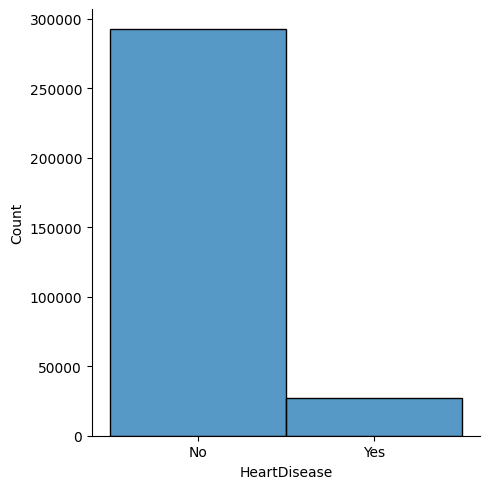

In [36]:
plt.figure(figsize=(50,20))
sns.displot(df['HeartDisease'])

<Figure size 5000x2000 with 0 Axes>

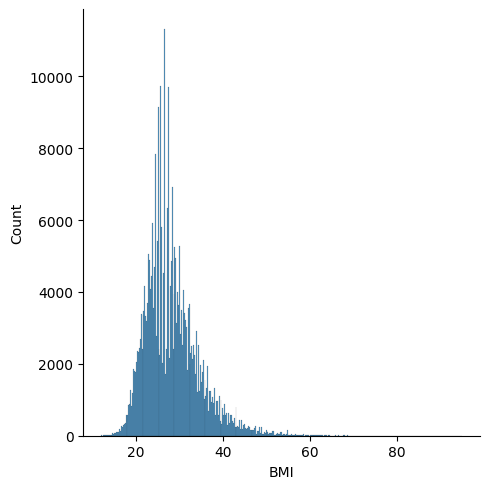

In [37]:
plt.figure(figsize=(50,20))
sns.displot(df['BMI'])

<Figure size 5000x2000 with 0 Axes>

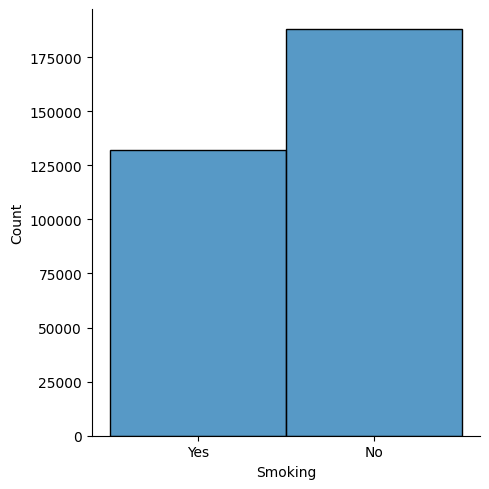

In [38]:
plt.figure(figsize=(50,20))
sns.displot(df['Smoking'])

<Figure size 5000x2000 with 0 Axes>

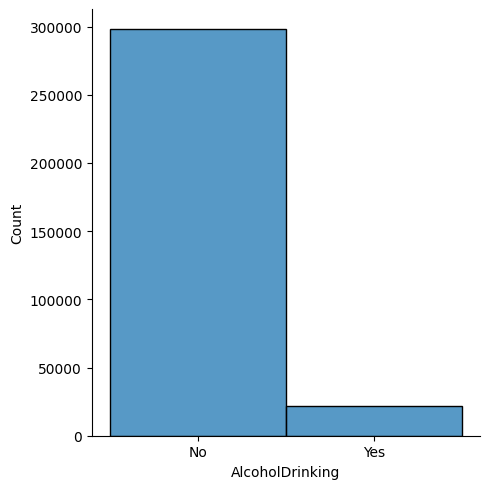

In [39]:
plt.figure(figsize=(50,20))
sns.displot(df['AlcoholDrinking'])

<Figure size 5000x2000 with 0 Axes>

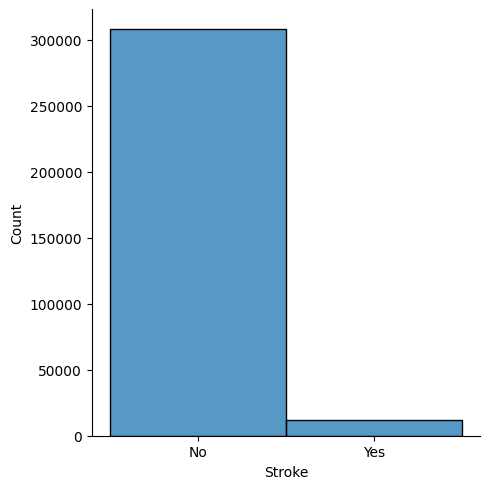

In [41]:
plt.figure(figsize=(50,20))
sns.displot(df['Stroke'])

<Figure size 5000x2000 with 0 Axes>

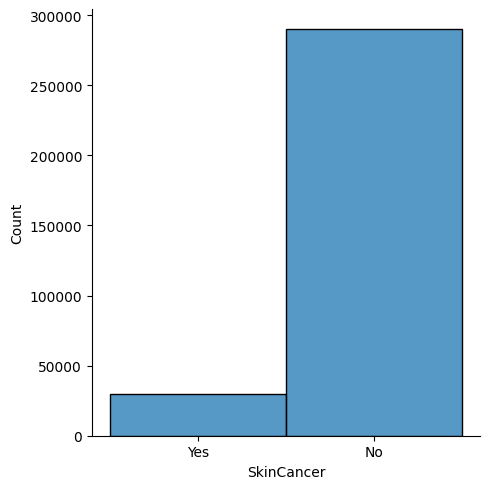

In [43]:
plt.figure(figsize=(50,20))
sns.displot(df['SkinCancer'])

<Figure size 5000x2000 with 0 Axes>

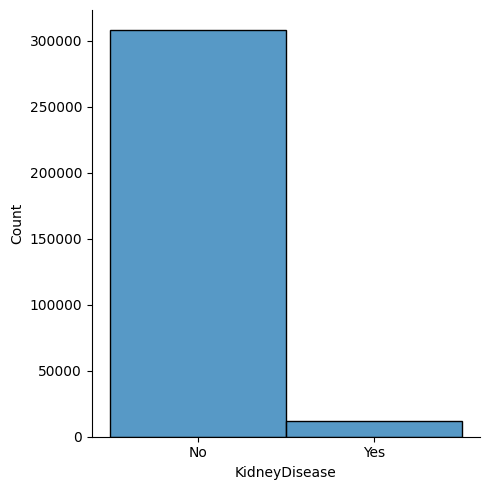

In [44]:
plt.figure(figsize=(50,20))
sns.displot(df['KidneyDisease'])

<Figure size 5000x2000 with 0 Axes>

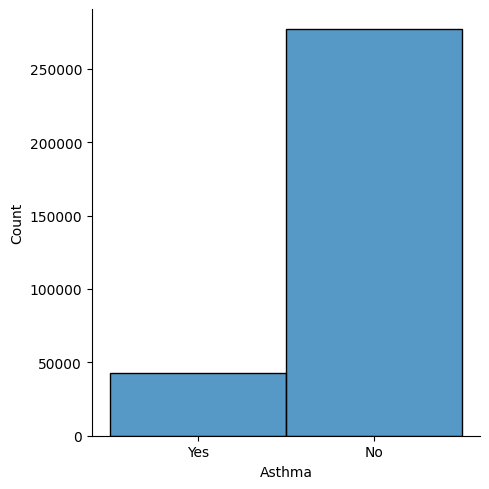

In [45]:
plt.figure(figsize=(50,20))
sns.displot(df['Asthma'])

<Figure size 5000x2000 with 0 Axes>

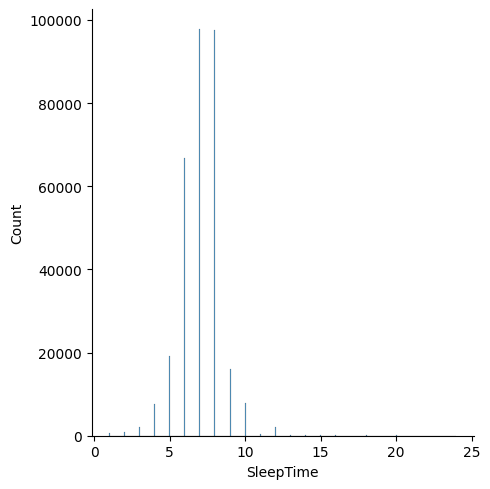

In [46]:
plt.figure(figsize=(50,20))
sns.displot(df['SleepTime'])

<Figure size 5000x2000 with 0 Axes>

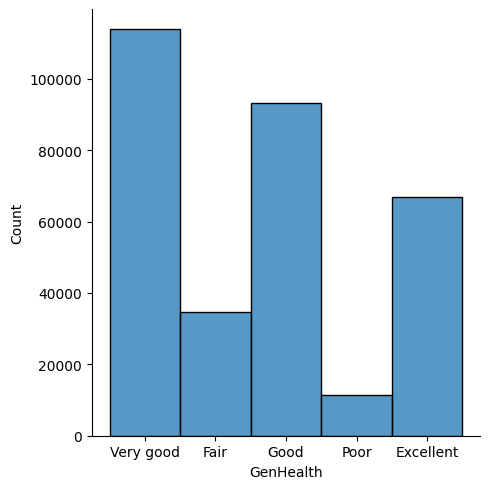

In [47]:
plt.figure(figsize=(50,20))
sns.displot(df['GenHealth'])

<Figure size 5000x2000 with 0 Axes>

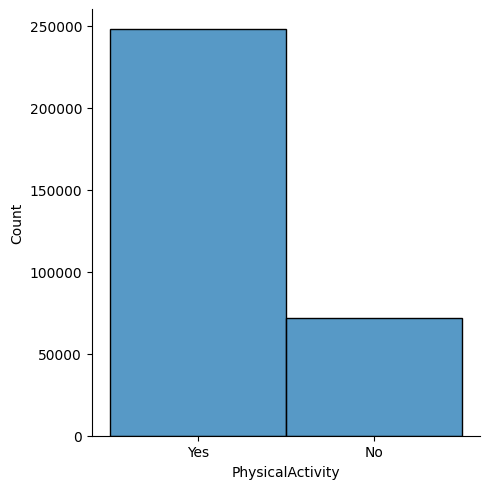

In [48]:
plt.figure(figsize=(50,20))
sns.displot(df['PhysicalActivity'])

<Figure size 2000x1800 with 0 Axes>

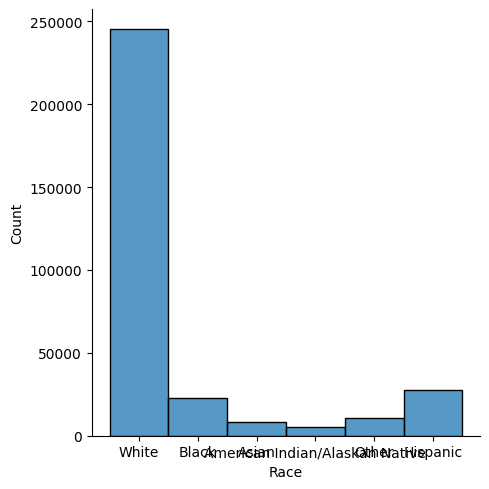

In [50]:
plt.figure(figsize=(20,18))
sns.displot(df['Race'])

<Figure size 2000x1800 with 0 Axes>

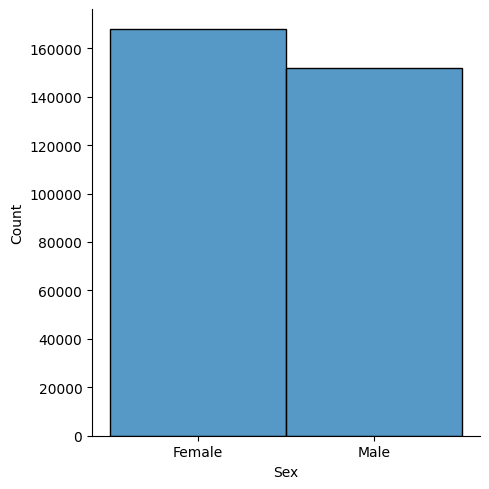

In [51]:
plt.figure(figsize=(20,18))
sns.displot(df['Sex'])

<Figure size 2000x1800 with 0 Axes>

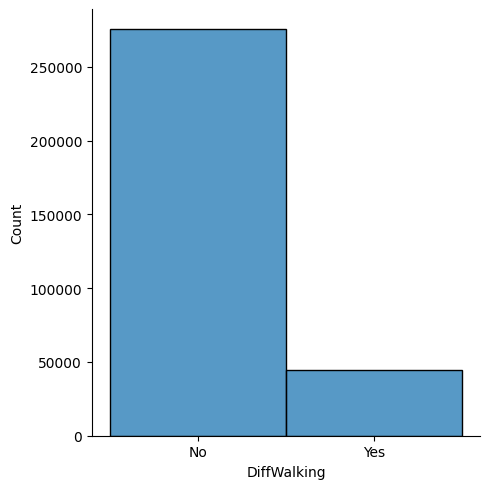

In [52]:
plt.figure(figsize=(20,18))
sns.displot(df['DiffWalking'])

In [54]:
df['Diabetic'].replace({'No, borderline diabetes':'No','Yes (during pregnancy)':'Yes'},inplace=True)
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

<Figure size 5000x2000 with 0 Axes>

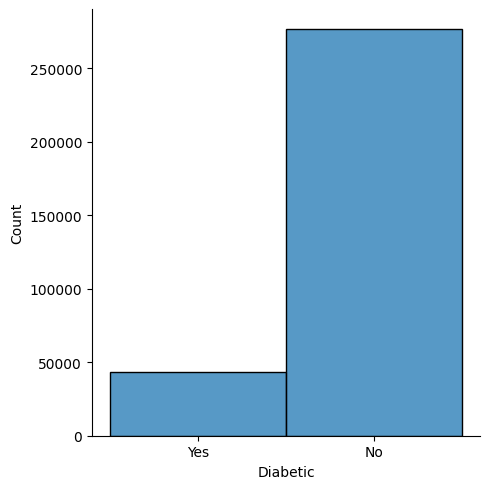

In [55]:
plt.figure(figsize=(50,20))
sns.displot(df['Diabetic'])

# Label EnCoding

In [56]:
le = LabelEncoder()

In [57]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,1,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,1,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [58]:
df.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime             int64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

# Resampling

In [62]:
x=df.drop('HeartDisease',axis=1)
y=df[['HeartDisease']]

In [63]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,1,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,1,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [64]:
y.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [65]:
df.duplicated().sum()

18491

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.shape

(301304, 18)

In [69]:
ov = RandomOverSampler(random_state=70)

In [70]:
x_new, y_new =ov.fit_resample(x,y)

In [71]:
y_new.value_counts()

HeartDisease
0               292422
1               292422
Name: count, dtype: int64

In [72]:
xtrain,xtest,ytrain,ytest = tts(x_new,y_new,test_size=0.3,random_state=45)

# Decision tree

In [75]:
dt = DecisionTreeClassifier()

In [76]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [77]:
dt_pred = dt.predict(xtest)

In [78]:
dt_pred

array([1, 1, 0, ..., 1, 1, 1])

In [81]:
dt_score = dt.score(xtest,ytest)

In [82]:
dt_score

0.9506651316014454

In [83]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     87425
           1       0.91      1.00      0.95     88029

    accuracy                           0.95    175454
   macro avg       0.96      0.95      0.95    175454
weighted avg       0.95      0.95      0.95    175454



In [84]:
dt_cm = confusion_matrix(ytest,dt_pred)

In [85]:
dt_cm

array([[78849,  8576],
       [   80, 87949]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix For Decision Tree')

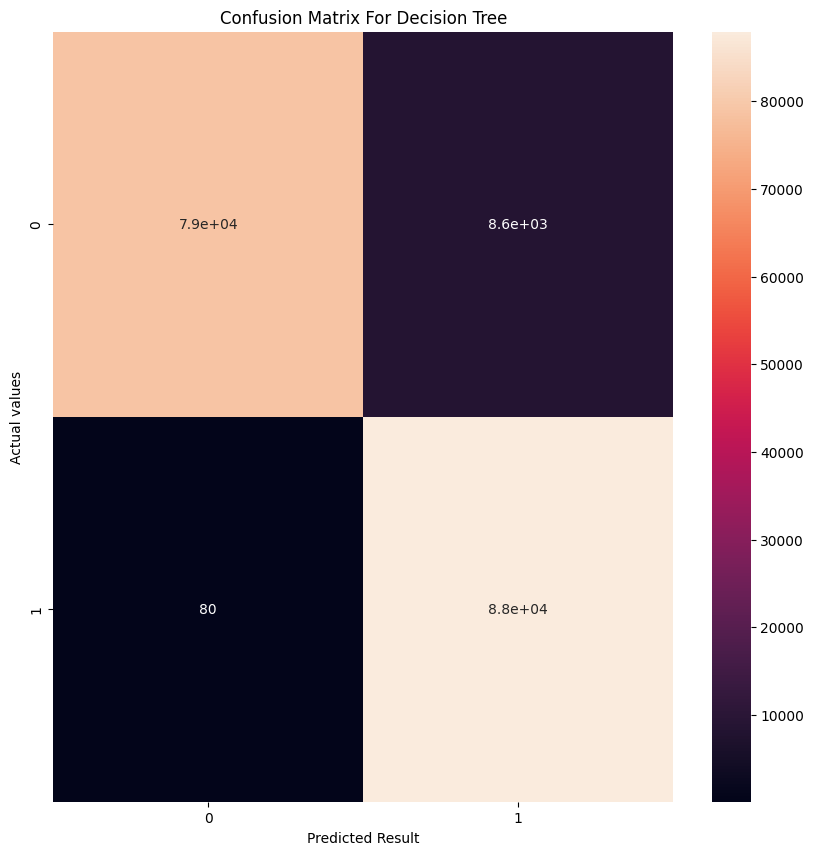

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(dt_cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix For Decision Tree')

# Random Forest

In [88]:
rf = RandomForestClassifier()

In [89]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [90]:
rf_pred = rf.predict(xtest)

In [91]:
rf_pred

array([1, 0, 0, ..., 1, 1, 1])

In [92]:
rf_score = rf.score(xtest,ytest)

In [93]:
rf_score

0.9642812361074697

In [94]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     87425
           1       0.93      1.00      0.97     88029

    accuracy                           0.96    175454
   macro avg       0.97      0.96      0.96    175454
weighted avg       0.97      0.96      0.96    175454



In [95]:
rf_cm = confusion_matrix(ytest,rf_pred)

In [96]:
rf_cm

array([[81203,  6222],
       [   45, 87984]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix For Random Forest')

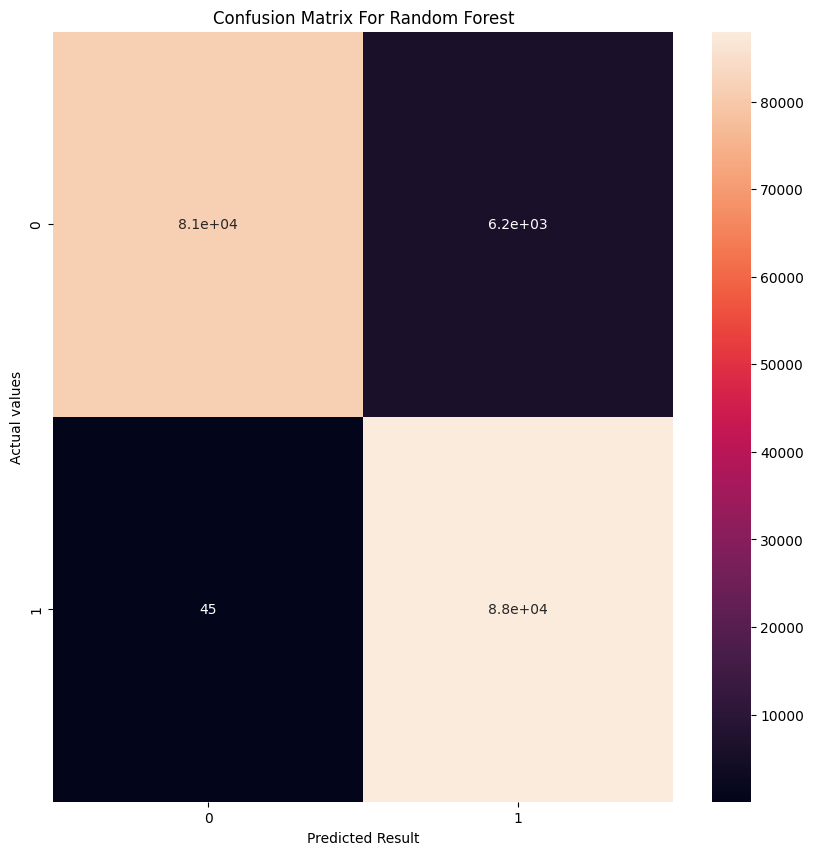

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(rf_cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix For Random Forest')

# KNN Classification

In [98]:
kn = KNeighborsClassifier(n_neighbors=4)

In [99]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [100]:
kn_pred = kn.predict(xtest)

In [101]:
kn_pred

array([1, 1, 0, ..., 1, 1, 1])

In [102]:
kn_score = kn.score(xtest,ytest)

In [103]:
kn_score

0.9146670922293023

In [104]:
print(classification_report(ytest,kn_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     87425
           1       0.86      0.99      0.92     88029

    accuracy                           0.91    175454
   macro avg       0.92      0.91      0.91    175454
weighted avg       0.92      0.91      0.91    175454



In [105]:
kn_cm = confusion_matrix(ytest,kn_pred)

In [106]:
kn_cm

array([[73684, 13741],
       [ 1231, 86798]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix For KNN classification')

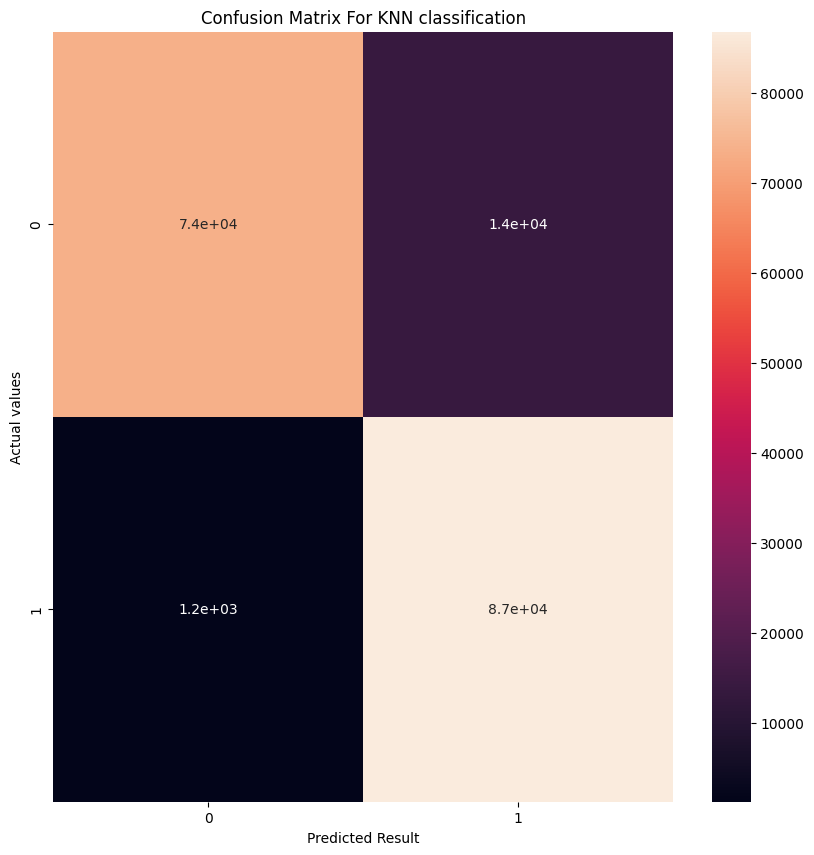

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(kn_cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix For KNN classification')

# Logistic Regression

In [108]:
log = LogisticRegression()

In [109]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [110]:
log_pred= log.predict(xtest)

In [111]:
log_pred

array([0, 1, 0, ..., 1, 1, 1])

In [112]:
log_score = log.score(xtest,ytest)

In [113]:
log_score

0.7499515542535365

In [114]:
print(classification_report(ytest,log_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     87425
           1       0.74      0.76      0.75     88029

    accuracy                           0.75    175454
   macro avg       0.75      0.75      0.75    175454
weighted avg       0.75      0.75      0.75    175454



In [115]:
log_cm = confusion_matrix(ytest,log_pred)

In [116]:
log_cm

array([[64362, 23063],
       [20809, 67220]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix For Logistic Regression')

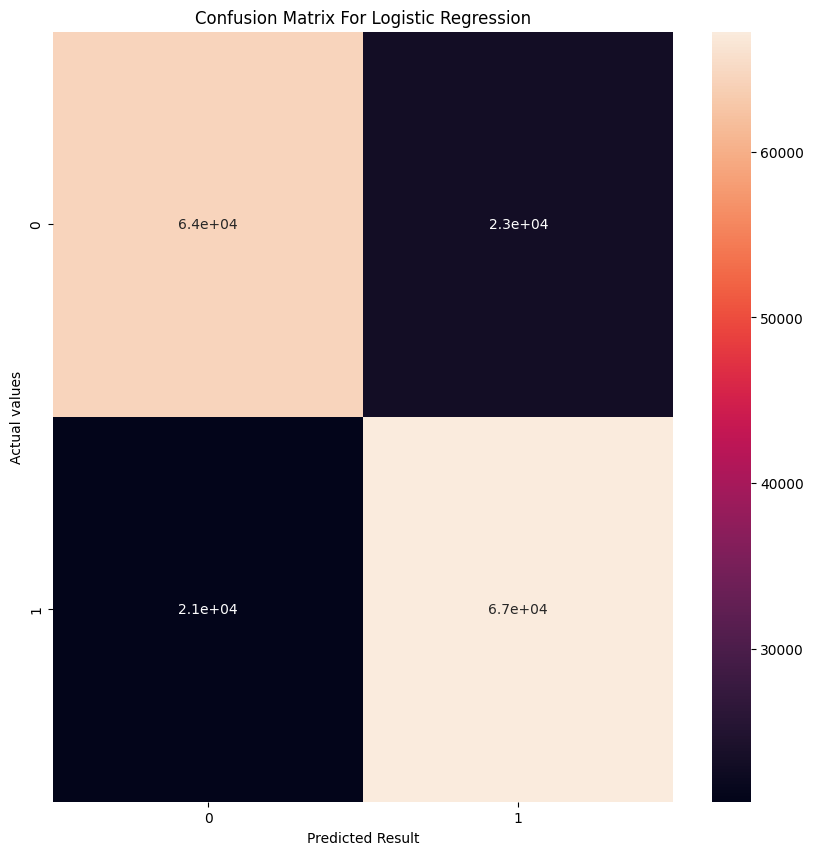

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(log_cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix For Logistic Regression')

# DataFrame Create

In [124]:
data = pd.DataFrame({'Models':['Decision Tree','Random forest','KNN classification','Logistic Regression'],
       'Accuracy': [dt_score,rf_score,kn_score,log_score]})


In [125]:
data.head()

,Models,Accuracy
0,Decision Tree,0.950665
1,Random forest,0.964281
2,KNN classification,0.914667
3,Logistic Regression,0.749952


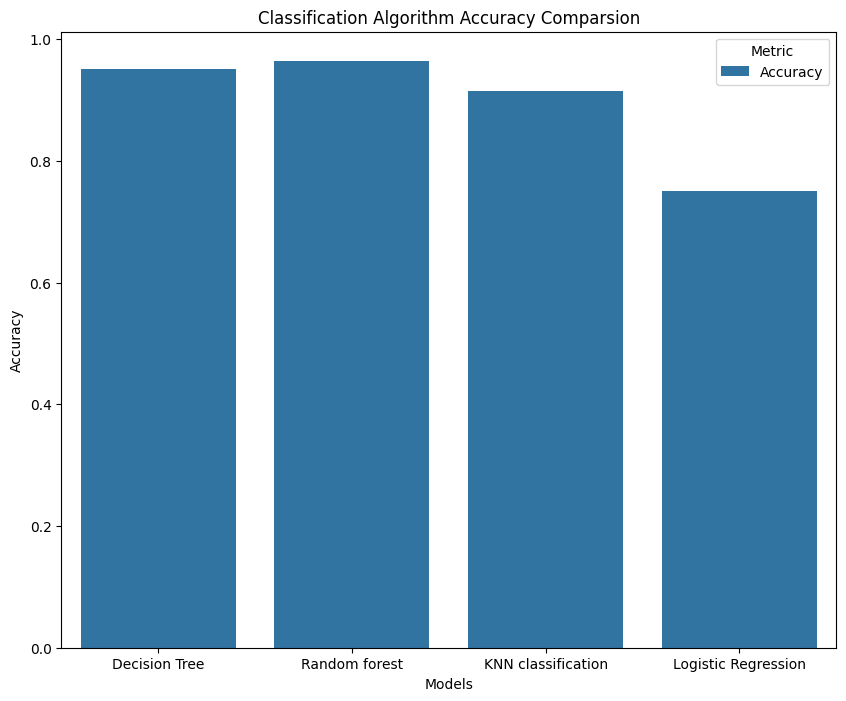

In [127]:
 plt.figure(figsize=(10,8))
data_bar = data.melt('Models', var_name='Metric', value_name='Value')
sns.barplot(x='Models', y='Value', hue='Metric', data=data_bar)
plt.title('Classification Algorithm Accuracy Comparsion')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Cross Validation on Random Forest Model

In [128]:
st = StratifiedKFold(n_splits=4)

In [129]:
rf_score = cross_val_score(rf,x_new,y_new,cv=st)

In [130]:
rf_score_mean = rf_score.mean()

In [131]:
rf_score_mean

0.9665380853697738